# We Rate Dogs (Twitter)



## Table of Contents

- [Gather](#gather)
  - [Import CSV Data File](#csv)
  - [Download Data using Requests](#requests)
  - [Download from Twitter API](#api)
- [Assess](#assess)
   - [Issues Summary](#issue_sum)
- [Clean](#clean)
- [Store](#store)
- [Analysing and Visualising](#analyse)
  

The first step is to import all the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy as tw
import json
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
<a id='gather'></a>
## Gather
<a id='csv'></a>
### Import CSV Data File
The WeRateDogs Twitter archive is stored in a csv file which should be imported.

In [2]:
archive=pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
archive.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
1414,698710712454139905,NaN,NaN,2016-02-14 03:29:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cuddles. He's not entirely sure how do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698710712...,10,10,Cuddles,None,None,None,None


<a id='request'></a>
### Download Data using Requests
The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file is hosted in the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [7]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('tweet-image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [3]:
images=pd.read_csv('tweet-image-predictions.tsv',delimiter='\t')

In [20]:
images.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


<a id='api'></a>
### Download from Twitter API
Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [21]:
# consumer_key = ''
# consumer_secret = ''
# access_token = '-'
# access_secret = ''

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tw.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)


In [11]:
archive.tweet_id.nunique()

2356

In [12]:
#List of tweet ids in arhive
tw_ids=archive.tweet_id.values
len(tw_ids)

2356

In [22]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails = {}
# Save each tweet's returned JSON as a new line in tweet-json.txt file
with open('tweet-json.txt', 'w') as outfile:
    for tweet_id in tw_ids:
        count += 1
#         print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tw.TweepError as e:
            print("Fail")
            fails[tweet_id] = e
            pass
print(fails)
print(count)

In [4]:
with open('tweet-json.txt') as json_file:  
    line = json_file.readline()
    tweet = json.loads(line)
print(tweet)

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [4]:
jsons=pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet-json.txt') as json_file:
    for line in json_file:
        tweet = json.loads(line)
        jsons = jsons.append({'tweet_id': tweet['id'],'retweet_count': tweet['retweet_count'],
                                      'favorite_count': tweet['favorite_count']}, ignore_index=True)
        

In [191]:
jsons.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
<a id='assess'></a>
## Assess
After gathering each of the above pieces of data, we assess them visually and programmatically for quality and tidiness issues. We should detect and document quality issues first and then tidiness issues.

There are four dimensions of quality data:

- **Completeness**: do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?
- **Validity**: we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).
- **Accuracy**: inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty.
- **Consistency**: inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.

The requirements for tidy data are:

- Each variable forms a column.
- Each observation forms a row.
- Each type of observational unit forms a table.

first move would be visual assessment. so getting a sample and info from each datafram should be helpful.

In [273]:
archive.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
453,818588835076603904,NaN,NaN,2017-01-09 22:42:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Chelsea. She forgot how...,7.735476e+17,4.196984e+09,2016-09-07 15:44:53 +0000,https://twitter.com/dog_rates/status/773547596...,11,10,Chelsea,None,None,pupper,None
2090,670786190031921152,NaN,NaN,2015-11-29 02:07:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Creg. You offered him a ride to work b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670786190...,8,10,Creg,None,None,None,None


In [93]:
images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
393,673583129559498752,https://pbs.twimg.com/media/CVkMRUeWsAA9bMh.jpg,1,Arctic_fox,0.153271,False,golden_retriever,0.113946,True,borzoi,0.110718,True
558,677698403548192770,https://pbs.twimg.com/media/CWerGmOXAAAm6NY.jpg,1,Shih-Tzu,0.916645,True,Lhasa,0.057883,True,Pekinese,0.020126,True
517,676440007570247681,https://pbs.twimg.com/media/CWMyl9EWUAAnZJ0.jpg,2,Maltese_dog,0.579472,True,toy_poodle,0.133446,True,Shih-Tzu,0.094397,True
626,680801747103793152,https://pbs.twimg.com/media/CXKxkseW8AAjAMY.jpg,1,pug,0.996720,True,Labrador_retriever,0.001439,True,Staffordshire_bullterrier,0.000518,True
414,674008982932058114,https://pbs.twimg.com/media/CVqPkVoU4AAkXA7.jpg,1,jigsaw_puzzle,0.970810,False,prayer_rug,0.011048,False,quill,0.008432,False


In [94]:
jsons.sample(5)

,tweet_id,retweet_count,favorite_count
1549,688064179421470721,381,1807
253,842846295480000512,3814,15805
802,771004394259247104,236,0
2304,666430724426358785,195,310
1283,707741517457260545,646,2600


In [192]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [193]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [194]:
jsons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [195]:
archive.shape,images.shape,jsons.shape

((2356, 17), (2075, 12), (2354, 3))

In [271]:
archive[archive.tweet_id.isin(images.tweet_id)].tweet_id.count()

2075

In [197]:
archive[archive.tweet_id.isin(jsons.tweet_id)].tweet_id.count()

2354

In [198]:
jsons[jsons.tweet_id.isin(images.tweet_id)].tweet_id.count()

2073

To check if the data values are valid we can use summary statistics to find the range of data.

In [122]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [124]:
jsons.describe()

,tweet_id,retweet_count,favorite_count
count,2339,2339,2339
unique,2338,1722,2012
top,666020888022790149,57,0
freq,2,5,167


As for some records such as text in archive the record cannot be displayed entirely it is better to check them separately.

In [140]:
archive.text.sample(50)

2130    This is Wally. He's a Flaccid Mitochondria. Go...
1476    This pupper is afraid of its own feet. 12/10 w...
1455    This is Bob. He just got back from his job int...
536     This is Lennon. He's a Boopershnoop Pupperdoop...
1550    We normally don't rate birds but I feel bad co...
1012    RT @dog_rates: This pupper killed this great w...
1280    Meet Malikai. He was rolling around having fun...
2184    Honor to rate this dog. Lots of fur on him. Tw...
2155    Very human-like. Cute overbite smile *finger t...
611     @JODYHiGHROLLER it may be an 11/10 but what do...
1129    Meet Pupcasso. You can't afford his art. 13/10...
76      This is Emmy. She was adopted today. Massive r...
550     This is Django. He accidentally opened the fro...
1797    This is the happiest pupper I've ever seen. 10...
28      This is Derek. He's late for a dog meeting. 13...
379     This is Boots. She doesn't know what to do wit...
928     This is Keith. He's pursuing a more 2D lifesty...
794     RT @do

In [272]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Sources are vague but it can be seen that there are only 4 sources of tweets, which are: twitter_iPhone, Vine, Twitter_web, Tweetdeck

<a id='issue_sum'></a>
<span style="color:Red; font-size: 2em"> Issues Summary
    
<a id='quality'></a>
### Quality
- [Q1: null values in columns of archive: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp. the data type are not correct either.](#Q1)
- [Q2: incomplete records among the 3 datasets. archive, images and jsons have 2356,2075,2339 records respectively.](#Q2)
- [Q3: non-descriptive column names in images p1-3,p1-3_conf.](#Q3)
- [Q4: there is an extra '+0000' at the end of timestamps.](#Q4)
- [Q5: in archive, timestamp type should be datetime and tweet_id must be string.](#Q5)
- [Q6: some of tweet_id which are in images are missing in jsons which can be due to tweets deleted recently.](#Q6)
- [Q7: the data type in jsons for counts should be integer instead of string.](#Q7)
- [Q8: the maximum value for ratings are extreme in archive summary statistics.](#Q8)
- [Q9: some denominator are other than 10](#Q9)
- [Q10: the numerator should not be extremely higher than 10. more than 20 may not make any sense.](#Q10)
- [Q11: source values are vague.](#Q11)
- [Q12: column arrangement is not approperiate.](#Q12)
- [Q13: We only want original dog ratings (no retweets)](#Q13)
    
<a id='tidiness'></a>
### Tidiness
- [T1: different stages of doggo, floofer, pupper and puppo should come in a single column 'stage' as category type](#T1)
- [T2: there is no need for archive and jsons to be seperated and so they can be merged into a single dataframe.](#T2)


//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
<a id='clean'></a>
## Clean
First we must make copies of dataframes:

In [107]:
archive_clean=archive.copy()
images_clean=images.copy()
jsons_clean=jsons.copy()

<a id='Q1'></a> <a id='Q4'></a> <a id='Q5'></a>
<span style="color:Red; font-size: 1.5em"> issue Q1, Q4, Q5
    
#### Define
- The columns with many null values  provide information about retweets and replies that may not occur for all tweets and so it is normal to have NaNs. However for the analysis in this project we only work on main tweets. So these columns can be dropped. 
- Remove +0000 at the end of timestamps and change type to datetime

#### Code
removing the last 5 digits:
   

In [108]:
archive_clean['timestamp']=archive_clean['timestamp'].str[:-5]
archive_clean['retweeted_status_timestamp']=archive_clean['retweeted_status_timestamp'].str[:-5]

changing the type to datetime:

In [109]:
archive_clean['retweeted_status_timestamp']=pd.to_datetime(archive_clean['retweeted_status_timestamp'])
archive_clean['timestamp']=pd.to_datetime(archive_clean['timestamp'])

#### Test

In [167]:
archive_clean.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

<span style="color:Red; font-size: 1.5em"> issue Q11
    
#### Define

- change source values to: iPhone, Vine, Web, Tweetdeck

#### Code

In [158]:
archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [110]:
archive_clean.source=archive_clean.source.str.extract('(iPhone|Web|TweetDeck|Vine)',expand=True)

#### Test

In [111]:
archive_clean.source.value_counts()

iPhone       2221
Vine           91
Web            33
TweetDeck      11
Name: source, dtype: int64

In [215]:
# Number of tweet from Vine source which has image
images_clean.tweet_id.isin(archive_clean[archive_clean.source == 'Vine'].tweet_id).sum()

0

above code shows that none of the tweets with Vine source has image and in case we want to make the size of archive the same as image using shared tweet_ids, all of the Vine tweets will be removed from the dataset. instead we can separate them as a separate dataset and save them into a csv file.

In [33]:
vine_tweet=archive_clean[archive_clean.source == 'Vine'].copy()

In [34]:
vine_tweet.to_csv('dog_vines.csv',index=False)

In [345]:
vine_tweet.head();

<span style="color:Red; font-size: 1.5em"> issue Q3 <a id='Q3'></a>
    
#### Define
- rename non-descriptive column titles in images p1,p1_conf. and drop p2-3,p2-3_conf as we don't use them later in our analysis.

#### Code

In [104]:
images_clean.head(1)

,tweet_id,jpg_url,img_num,prediction_1,p1_confidence,p1_dog,prediction_2,p2_confidence,p2_dog,prediction_3,p3_confidence,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [112]:
images_clean = images_clean.rename(columns={"p1": "prediction_1", "p2": "prediction_2",
                                           'p3': "prediction_3", "p1_conf": "p1_confidence",
                                           "p2_conf": "p2_confidence", "p3_conf": "p3_confidence"});

<span style="color:Red; font-size: 1.5em"> issue Q7 <a id='Q7'></a>
    
#### Define
- change the data type in jsons for counts to integer

#### Code

In [50]:
jsons_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2337
Data columns (total 3 columns):
tweet_id          2066 non-null object
retweet_count     2066 non-null object
favorite_count    2066 non-null object
dtypes: object(3)
memory usage: 64.6+ KB


In [113]:
jsons_clean.retweet_count=jsons_clean.retweet_count.astype('int64')
jsons_clean.favorite_count=jsons_clean.favorite_count.astype('int64')

#### Test

In [114]:
jsons_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


<span style="color:Red; font-size: 1.5em"> issue Q8, Q9, Q10 <a id='Q8'></a><a id='Q9'></a><a id='Q10'></a>
    
#### Define
- Check records with any denominator other than 10 in archive and convert them into 10.
- Rename numerator to rating_from_10 and drop denominator column

#### Code

In [95]:
archive_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [126]:
check=archive_clean[archive_clean.rating_denominator != 10]
for i in check.index:
    print(str(i)+': '+archive.text[i])
    print(str(archive.rating_numerator[i])+'/'+str(archive.rating_denominator[i]))

342: @docmisterio account started on 11/15/15
11/15
433: The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
84/70
516: Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
24/7
784: RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
9/11
902: Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
165/150
1068: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
9/11
1120: Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
204/170
1165: Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
4/20
1202: This is Bluebert. He just saw that both #Final

By visually inspecting the texts above it can be seen some dates and numbers are mistaken by ratings, which should be deleted from the dataframe.(record: 342,516)

Moreover the numerator and denominator of some can be corrected manually.(record: 1202, 2335, 313, 1165,1662)
which can be corrected individually as follow:

In [134]:
archive_clean.loc[1202,'rating_numerator']=11
archive_clean.loc[2335,'rating_numerator']=9
archive_clean.loc[313,'rating_numerator']=13
archive_clean.loc[313,'rating_denominator']=10
archive_clean.loc[1165,'rating_numerator']=13
archive_clean.loc[1165,'rating_denominator']=10
archive_clean.loc[1662,'rating_numerator']=10
archive_clean.loc[1662,'rating_denominator']=10
archive_clean.loc[2335,'rating_numerator']=9
archive_clean.loc[2335,'rating_denominator']=10

In [128]:
ind_dro=[342, 516]
archive_clean.drop(ind_dro,axis=0,inplace=True)

In [136]:
arch=archive_clean.copy()
arch.rating_numerator = (arch.rating_numerator / arch.rating_denominator * 10).astype('int64')

In [137]:
arch[arch.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,iPhone,The floofs have been released I repeat the flo...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/820690176...,12,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06,iPhone,"RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38,https://twitter.com/dog_rates/status/740373189...,8,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,iPhone,Why does this never happen at my front door......,NaN,NaN,NaT,https://twitter.com/dog_rates/status/758467244...,11,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,iPhone,"After so many requests, this is Bretagne. She ...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/740373189...,8,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,iPhone,Say hello to this unbelievably well behaved sq...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/731156023...,12,170,this,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,iPhone,This is Bluebert. He just saw that both #Final...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/716439118...,2,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02,iPhone,Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/713900603...,11,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49,iPhone,Here's a brigade of puppers. All look very pre...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/710658690...,10,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08,iPhone,"From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/709198395...,9,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30,iPhone,Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/704054845...,12,50,a,None,None,None,None


Now drop the denominator column as it only contain value 0f 10 for all records and has no useful info

In [138]:
arch.drop('rating_denominator',axis=1,inplace=True)

change the name of numerator to rating_from_10

In [139]:
arch.rename(columns={'rating_numerator':'rating_from_10'},inplace=True)

#### Test

In [140]:
arch.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_from_10,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,None


In [141]:
arch.shape

(2354, 16)

In [142]:
archive_clean=arch.copy()

 <a id='Q13'></a>
<span style="color:Red; font-size: 1.5em"> issue Q13
    
#### Define
Drop all the record with not null value of retweeted_status_id 
#### Code

In [143]:
arch3=archive_clean.copy()

In [144]:
arch3[arch3.retweeted_status_user_id.notnull()].tweet_id.count()

181

In [52]:
# arch1[arch1.notnull['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
#                'retweeted_status_user_id','tweet_id']]= archive[archive.notnull[
#     'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','tweet_id']].astype(int)

In [145]:
arch3=arch3[arch3.retweeted_status_user_id.isnull()]
arch3.shape

(2173, 16)

### Test

In [146]:
arch3[arch3.retweeted_status_id.notnull()].tweet_id.count()

0

Now drop these retweet columns

In [147]:
dr_col=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id'
        ,'retweeted_status_user_id','retweeted_status_timestamp']

arch3.drop(dr_col,axis=1,inplace=True)

In [148]:
arch3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id          2173 non-null int64
timestamp         2173 non-null datetime64[ns]
source            2173 non-null object
text              2173 non-null object
expanded_urls     2116 non-null object
rating_from_10    2173 non-null int64
name              2173 non-null object
doggo             2173 non-null object
floofer           2173 non-null object
pupper            2173 non-null object
puppo             2173 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 203.7+ KB


In [149]:
archive_clean=arch3.copy()

<span style="color:Red; font-size: 1.5em"> issue T1 <a id='T1'></a>
    
#### Define
Convert doggo, floofer, pupper, puppo, and none to categories in a single column
#### Code

In [190]:
((archive_clean.doggo !='None') & (archive_clean.floofer !='None')).sum()

1

In [150]:
((archive_clean.doggo !='None') & (archive_clean.pupper !='None')).sum()

10

In [192]:
((archive_clean.doggo !='None') & (archive_clean.puppo !='None')).sum()

1

In [384]:
((archive_clean.floofer !='None') & (archive_clean.puppo !='None')).sum()

0

In [385]:
((archive_clean.floofer !='None') & (archive_clean.puppo !='None')).sum()

0

In [392]:
((archive_clean.pupper !='None') & (archive_clean.puppo !='None')).sum()

0

In [151]:
archive_clean.shape[0],jsons_clean.shape[0],images_clean.shape[0]

(2173, 2354, 2075)

In [152]:
((archive_clean.floofer =='None') & (archive_clean.puppo =='None') &
 (archive_clean.pupper =='None') & (archive_clean.doggo =='None')).sum()

1829

There are 1829 records without any stage. we can check if any stage is mentioned in the text.

In [153]:
# archive_clean[archive_clean['text'].str.contains("doggo|pupp|floof")].tweet_id.count()
arch_txt=archive_clean[(archive_clean.floofer =='None') & (archive_clean.puppo =='None')
              & (archive_clean.pupper =='None') & (archive_clean.doggo =='None')]

In [154]:
arch_txt=arch_txt[arch_txt.text.str.contains("doggo|pupper|puppo|floofer|floofs")]
arch_txt.text.str.contains("doggo|pupper|puppo|floofer|floofs").sum()

40

There are 40 records with information about stage in the text while the stage is not recorded in the stages columns.

In [155]:
arch2=archive_clean.copy()

In [156]:
for t in arch_txt.text:
    j = arch_txt[arch_txt.text==t].index[0]
    if 'doggo' in t:
        arch2.loc[j,'doggo']='doggo'
    elif 'floof' in t:
        arch2.loc[j,'floofer']='floofer'
    elif 'puppo' in t:
        arch2.loc[j,'puppo']='puppo'
    elif 'pupper' in t:
        arch2.loc[j,'pupper']='pupper'

In [157]:
((arch2.floofer =='None') & (arch2.puppo =='None') &
 (arch2.pupper =='None') & (arch2.doggo =='None')).sum()

1789

Now to convert all the stages to a single column, we convert the none to 0 and the rest to 1

In [158]:
arch2.doggo = arch2.doggo.replace('None', 0)
arch2.doggo = arch2.doggo.replace('doggo', 1)
arch2.floofer = arch2.floofer.replace('None', 0)
arch2.floofer = arch2.floofer.replace('floofer', 1)
arch2.pupper = arch2.pupper.replace('None', 0)
arch2.pupper = arch2.pupper.replace('pupper', 1)
arch2.puppo = arch2.puppo.replace('None', 0)
arch2.puppo = arch2.puppo.replace('puppo', 1)

We need to add a column 'None' for records without stage

In [159]:
arch2['none'] = 1-(arch2.doggo+arch2.floofer+arch2.pupper+arch2.puppo)

there are 13 tweets with multiple stages whcih can be found with -1 value in none column, so we can separate them in another column before melting all stages to single column

In [160]:
arch2['multi_stage']= 0
multi_ind=arch2[arch2.none == -1].index
for ii in multi_ind:
    arch2.loc[ii,'multi_stage']= 1
    arch2.loc[ii,'doggo':'none']= 0    

In [161]:
vals = ['doggo', 'floofer', 'pupper', 'puppo','none','multi_stage']
ids=['tweet_id','timestamp','source','text','expanded_urls','rating_from_10','name']
arch2=pd.melt(arch2,id_vars=ids,value_vars=vals,var_name='stage')

In [162]:
arch2=arch2[arch2.value == 1]
# archive_clean.head()

In [163]:
arch2.drop('value',axis=1,inplace=True)

In [164]:
arch2.tweet_id.duplicated().sum()

0

#### Test

In [165]:
arch2.shape

(2173, 8)

In [166]:
arch2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 9 to 11798
Data columns (total 8 columns):
tweet_id          2173 non-null int64
timestamp         2173 non-null datetime64[ns]
source            2173 non-null object
text              2173 non-null object
expanded_urls     2116 non-null object
rating_from_10    2173 non-null int64
name              2173 non-null object
stage             2173 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 152.8+ KB


In [184]:
archive_clean=arch2.copy()

<span style="color:Red; font-size: 1.5em"> issue Q12 <a id='Q12'></a>
    
#### Define
Rearrange columns in a better way
#### Code

#### Test

In [77]:
images_clean.img_num.value_counts()

1    1779
2     197
3      66
4      31
Name: img_num, dtype: int64

In [185]:
images_clean.drop('img_num', axis=1, inplace=True)

In [186]:
images_clean.head()

,tweet_id,jpg_url,prediction_1,p1_confidence,p1_dog,prediction_2,p2_confidence,p2_dog,prediction_3,p3_confidence,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In this particular project we do not use the second and third predictions in the analysis. So we can drop them for ease of work.

In [187]:
cols2 = ['tweet_id','prediction_1','p1_confidence','p1_dog','jpg_url']

In [201]:
images_clean = images_clean[cols2]

In [202]:
images_clean=image_clean.rename(columns={'prediction_1':'breed','p1_confidence':'confidence','p1_dog':'dog'})

In [203]:
images_clean.head(1)

,tweet_id,breed,confidence,dog,jpg_url
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg


<a id='T2'></a>
<span style="color:Red; font-size: 1.5em"> issue Q2, Q6, T2 <a id='Q2'></a> <a id='Q6'></a>
    
#### Define
We can merge all the dataframes into a single dataframe to solve the issues. So first we find the smallest dataframe and merge all based on tweet ids.
#### Code

In [200]:
archive_clean.shape[0],images_clean.shape[0],jsons_clean.shape[0]

(2173, 2075, 2354)

In [194]:
# main_ids=images.tweet_id.values
archive_clean[archive_clean.tweet_id.isin(jsons_clean.tweet_id.values)].tweet_id.count()

2173

In [195]:
archive_clean[archive_clean.tweet_id.isin(images_clean.tweet_id.values)].tweet_id.count()

1993

In [204]:
two_in_one=pd.merge(archive_clean,images_clean,on='tweet_id')

In [205]:
all_in_one=pd.merge(two_in_one,jsons_clean,on='tweet_id')

We can drop url column as well as it does not provide any useful info.

In [206]:
all_in_one.drop('expanded_urls',axis=1,inplace=True)

#### Test

In [207]:
all_in_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 13 columns):
tweet_id          1993 non-null int64
timestamp         1993 non-null datetime64[ns]
source            1993 non-null object
text              1993 non-null object
rating_from_10    1993 non-null int64
name              1993 non-null object
stage             1993 non-null object
breed             1993 non-null object
confidence        1993 non-null float64
dog               1993 non-null bool
jpg_url           1993 non-null object
retweet_count     1993 non-null int64
favorite_count    1993 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 204.4+ KB


In [208]:
cols = ['tweet_id','name','stage','breed','confidence','dog','rating_from_10', 'retweet_count', 'favorite_count','source','jpg_url','text','timestamp']
all_in_one = all_in_one[cols]

Combine all the dataframe into one master dataframe:

In [209]:
all_in_one.shape

(1993, 13)

In [233]:
all_in_one=all_in_one.reset_index().drop('index',axis=1)

In [235]:
# all_in_one.head()

In [210]:
all_in_one.tweet_id= all_in_one.tweet_id.astype(str)

In [236]:
twitter_archive_master=all_in_one.copy()

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
<a id='store'></a>
## Store
Store the final dataframe into SQLite

In [237]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///weratedogs.db')
twitter_archive_master.to_sql('tweet', engine, index=False)

Store the final dataframe into csv file

In [238]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
<a id='analyse'></a>
## Analyse and Visulise
The questions to be answered are as follows:
- [Most common breed in predictions?](#breed)
- [Most popular name?](#name)
- [How do rating, favorite count and retweet count change over time?](#time)
- [What is the most rated dog breed?](#rate)
- [what are the most distinctive looking dog breeds?](#look)

### Most common breed in predictions? <a id='breed'></a>


In [239]:
tweet_analyse=twitter_archive_master.copy()

In [240]:
tweet_analyse.head(1)

,tweet_id,name,stage,breed,confidence,dog,rating_from_10,retweet_count,favorite_count,source,jpg_url,text,timestamp
0,890240255349198849,Cassie,doggo,Pembroke,0.511319,True,14,7711,32467,iPhone,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,This is Cassie. She is a college pup. Studying...,2017-07-26 15:59:51


In [229]:
# tweet_analyse[tweet_analyse.rating_from_10 > 20]

In [241]:
tweet_analyse.describe()

,confidence,rating_from_10,retweet_count,favorite_count
count,1993.000000,1993.000000,1993.000000,1993.000000
mean,0.593802,11.686402,2767.311089,8897.215253
std,0.271951,40.677378,4675.805285,12216.077179
min,0.044333,0.000000,16.000000,81.000000
25%,0.362835,10.000000,624.000000,1981.000000
50%,0.587507,11.000000,1359.000000,4134.000000
75%,0.845256,12.000000,3220.000000,11310.000000
max,1.000000,1776.000000,79515.000000,132810.000000


In [242]:
dogs=tweet_analyse[tweet_analyse.dog==True]
conf_dog=dogs[dogs.confidence > 0.4]

As we considered the predictions with confidence of 0.4 and more, we should check the image for some to see if they are dog or not. So we check around confidence 0.4

In [243]:
from IPython.display import Image
from IPython.core.display import HTML

In [244]:
urls= tweet_analyse[(tweet_analyse.confidence > 0.4) & (tweet_analyse.confidence < 0.43)]
i=1
print('Breed: '+urls.breed.values[i]+' with confidence of: '+str(round(urls.confidence.values[i],3)))
Image(url=urls.jpg_url.values[i])

Breed: Samoyed with confidence of: 0.401


After checking 20 of images all of them was found to be correct dog.

In [245]:
conf_dog.breed.value_counts()[:10]

golden_retriever      120
Pembroke               80
Labrador_retriever     78
Chihuahua              55
pug                    47
Samoyed                35
Pomeranian             34
toy_poodle             30
chow                   28
French_bulldog         23
Name: breed, dtype: int64

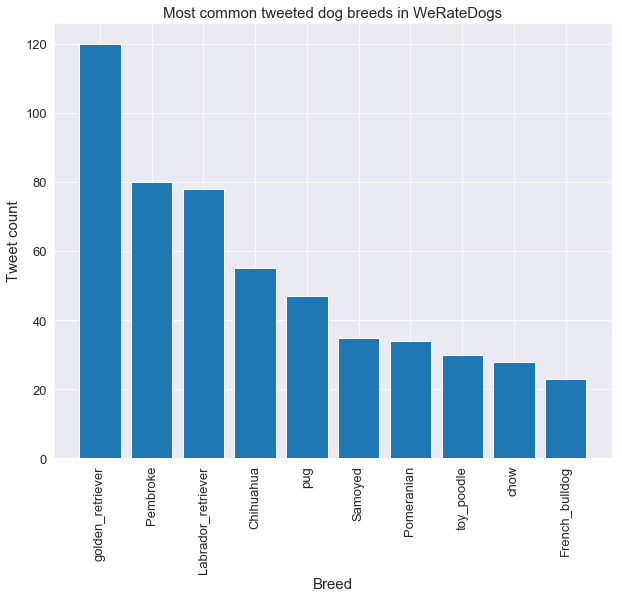

In [223]:
com_breed=conf_dog.breed.value_counts()

sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

x=com_breed.index[:10]
y=com_breed.values[:10]

plt.bar(range(len(x)), y);

label = x;

plt.xticks(range(len(x)), label);

plt.xticks(fontsize=13, rotation=90);
plt.yticks(fontsize=13)
plt.title('Most common tweeted dog breeds in WeRateDogs', fontsize=15)
plt.ylabel('Tweet count', fontsize=15);
plt.xlabel('Breed', fontsize=15);

It is seen that Golden Retrievers are the most popular breed, followed by Pembrokes and Labrador Retrievers.

### Most popular name? <a id='name'></a>

In [224]:
dogs[~dogs.name.isin(['a','None'])].name.value_counts()[:10]

Charlie    10
Cooper     10
Oliver      9
Lucy        8
Tucker      8
Penny       7
Sadie       7
Daisy       7
Winston     6
Jax         6
Name: name, dtype: int64

So Charlie and Cooper are the most favorite names.

### How do rating, favorite count and retweet count change over time?
First we should remove extreme values using quantiles.

In [249]:
qf = dogs.favorite_count.quantile([0.05, 0.95])
qr = dogs.retweet_count.quantile([0.05, 0.95])

rating=dogs.drop(dogs[dogs.rating_from_10 > 20].index)

favorite=dogs.drop(dogs[dogs.favorite_count < qf[0.05]].index)
favorite=favorite.drop(dogs[dogs.favorite_count > qf[0.95]].index)

retweet=dogs.drop(dogs[dogs.retweet_count < qr[0.05]].index)
retweet=retweet.drop(dogs[dogs.retweet_count > qr[0.95]].index)

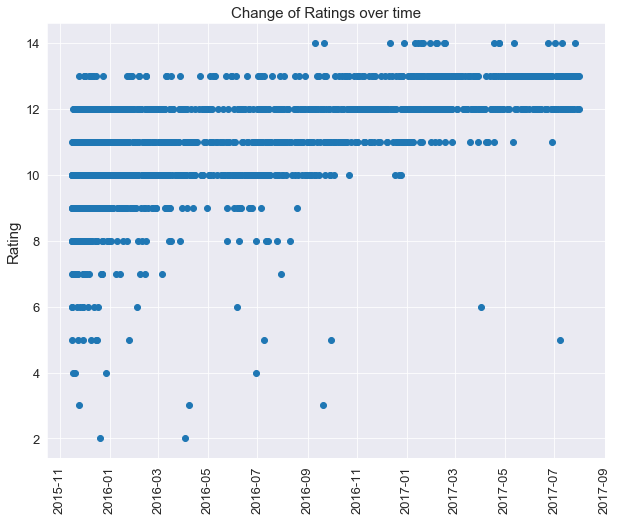

In [250]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

x = rating.timestamp.values
y = rating.rating_from_10.values

plt.plot_date(x, y)

plt.xticks(fontsize=13, rotation=90);
plt.yticks(fontsize=13)
plt.title('Change of Ratings over time', fontsize=15)
plt.ylabel('Rating', fontsize=15);
# plt.xlabel('Time', fontsize=15);

It is obvious that the ratings have increase over time as for example since 2016-09 most ratings are higher than 9.

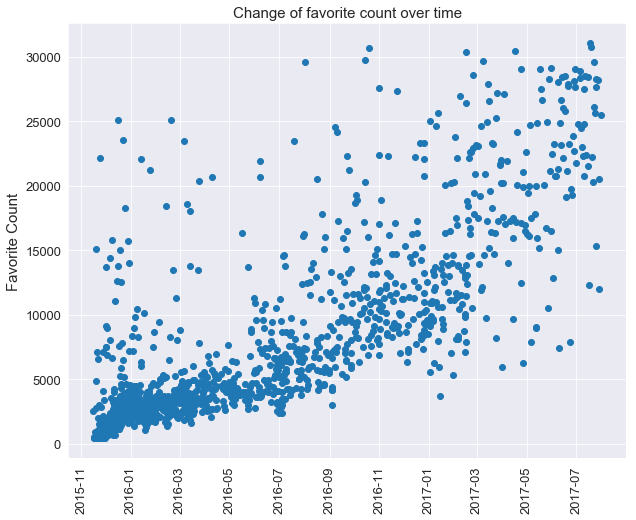

In [251]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

x = favorite.timestamp.values
y = favorite.favorite_count.values

plt.plot_date(x, y)

plt.xticks(fontsize=13, rotation=90);
plt.yticks(fontsize=13)
plt.title('Change of favorite count over time', fontsize=15)
plt.ylabel('Favorite Count', fontsize=15);
# plt.xlabel('Time', fontsize=15);

The number of times an @dog_rates tweet is favorited has increased over time.

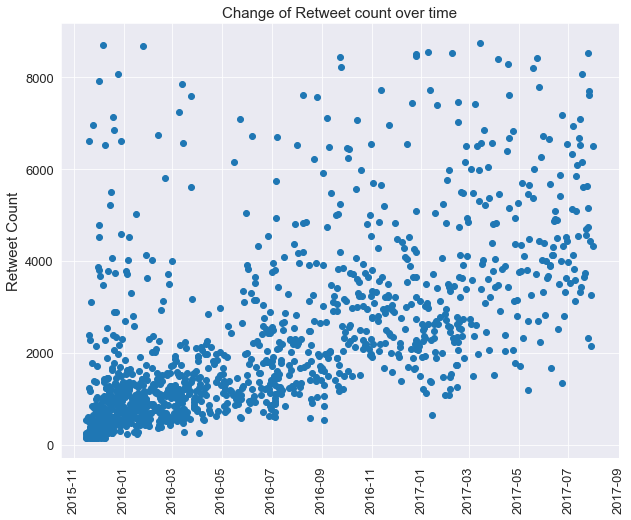

In [252]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

x = retweet.timestamp.values
y = retweet.retweet_count.values

plt.plot_date(x, y)

plt.xticks(fontsize=13, rotation=90);
plt.yticks(fontsize=13)
plt.title('Change of Retweet count over time', fontsize=15)
plt.ylabel('Retweet Count', fontsize=15);
# plt.xlabel('Time', fontsize=15);

An increase is also seen in number of retweets after the first tweet over time, which is though not as significant as favorite count.

### What is the most rated dog breed? <a id='rate'></a>
The rating of the dogs for those with at least 10 tweets is compared

In [253]:
cb=conf_dog.breed.value_counts()
com_breed=[]
j=0
for ii in cb:
    j+=1
    if ii > 10:
        com_breed.append(cb.index[j])

In [254]:
# com_breed=conf_dog.breed.value_counts().index[:10]
rates=conf_dog[conf_dog.breed.isin(com_breed)].groupby('breed').rating_from_10.mean().sort_values(ascending=False)
rates[:10]

breed
Pomeranian        13.000000
Eskimo_dog        12.083333
Samoyed           11.742857
chow              11.714286
Cardigan          11.692308
Great_Pyrenees    11.545455
Pembroke          11.450000
toy_poodle        11.333333
cocker_spaniel    11.312500
Siberian_husky    11.307692
Name: rating_from_10, dtype: float64

Pomeranians are the most rated breed, followed by Eskimo_dogs and Samoyed. We can again visualise this:

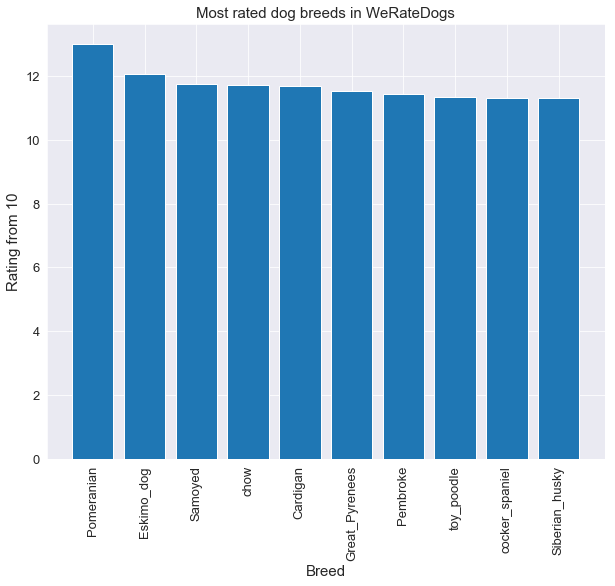

In [255]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

x = rates.index[:10]
y = rates.values[:10]

plt.bar(range(len(x)), y);

label = x;

plt.xticks(range(len(x)), label);

plt.xticks(fontsize=13, rotation=90);
plt.yticks(fontsize=13)
plt.title('Most rated dog breeds in WeRateDogs', fontsize=15)
plt.ylabel('Rating from 10', fontsize=15);
plt.xlabel('Breed', fontsize=15);

### what are the most distinctive looking dog breeds?  <a id='look'></a>
Again we check the confidence among those with more than 10 ratings

In [256]:
dist=conf_dog[conf_dog.breed.isin(com_breed)].groupby('breed').confidence.mean().sort_values(ascending=False)
dist[:10]

breed
French_bulldog       0.829790
pug                  0.826743
Samoyed              0.813738
Pomeranian           0.799130
chow                 0.774743
Shih-Tzu             0.763880
Pembroke             0.760274
Maltese_dog          0.754328
Shetland_sheepdog    0.747350
German_shepherd      0.741523
Name: confidence, dtype: float64

French_bulldogs are the most distinctive looking breed to be identified from the image, followed by Pugs and samoyed.